# Text Analysis of Titles Descriptions and Tags

In [18]:
import pandas as pd
import numpy as np
import re
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

#natural language toolkit for list of stop words
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [19]:
data = pd.read_csv('data/mergedData041022clean.csv')

## Titles and Descriptions

In [20]:
#make all title and descriptions lowercase
title = data['title_listing'].str.lower()
desc = data['description'].str.lower()

### Listings that contain specific products of interest

In [25]:
# function that returns percentage of listings that contain a specific word

def percentage_item(text, word):
    true = text[text.str.contains(' ' + word + ' ')==True]
    percent = len(true)/len(text)
    return percent

In [26]:
# percentage of listings that contain a specific product in their title and description

# I chose these items because I was interested in them
items = ['mug', 'plate', 'bowl', 'jar', 'planter', 'berry bowl', 'butter dish', 'cup', 'tumbler', 'bacon cooker', 'spoon rest']

for i in items:
    print("The word '" + i + "' is in " + "{:.2%}".format(percentage_item(title, i)) + " of titles and " + "{:.2%}".format(percentage_item(desc, i)) + " of descriptions.")


The word 'mug' is in 11.84% of titles and 18.97% of descriptions.
The word 'plate' is in 2.41% of titles and 5.00% of descriptions.
The word 'bowl' is in 7.94% of titles and 13.40% of descriptions.
The word 'jar' is in 1.40% of titles and 1.88% of descriptions.
The word 'planter' is in 1.47% of titles and 1.75% of descriptions.
The word 'berry bowl' is in 0.11% of titles and 0.11% of descriptions.
The word 'butter dish' is in 0.24% of titles and 0.27% of descriptions.
The word 'cup' is in 6.19% of titles and 10.40% of descriptions.
The word 'tumbler' is in 0.88% of titles and 1.67% of descriptions.
The word 'bacon cooker' is in 0.00% of titles and 0.03% of descriptions.
The word 'spoon rest' is in 0.62% of titles and 1.34% of descriptions.


### Remove punctuation, special characters and stop words from the titles and descriptons

In [28]:
# function that removes "\n", links, as well as special characters and numbers fromt text
def clean_text(text):
    for i in range (0, len(text)):
        n = '\n'
        string = text[i]
        if n in string:
            string = string.replace(n, " ")
            text[i] = string
        text[i] = re.sub("[^A-za-z]+"," ", text[i])
        text[i] = re.sub(r"http\S+","",text[i])
        text[i] = re.sub(r"www\S+","",text[i])

In [29]:
# Clean descriptions and titles
clean_text(desc)
clean_text(title)

In [30]:
#split the title strings on the spaces
title = title.str.split(" ")
desc = desc.str.split(" ")

In [31]:
## define the stopwords
stop = stopwords.words('english')

In [38]:
# add pottery-related keywords, and other irrelevant words to stopwords
stop.extend(['handmade','stoneware','pottery','ceramic','clay','x', '|','cm', 'oz', 'ml', ' ', '', 'www', 'com',
'shipping','item','items','hand','made','piece','pieces','make','please','one','use','may','inches','also',
'high','etsy', 'quot', 'wheel', 'thrown', 'wheelthrown', 'glaze', 'glazed'])

In [39]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
test = desc.head(5)

In [54]:
# Define a function that removes the stopwords
""" 
Args:
txt (series): the text as a series of lists
wrds (list): the stopwords to be removed from the list
"""
def remove_stopwords(txt, wrds):
    for i in range (0, len(txt)):
        for s in wrds:
            lst = txt[i]
            lst = [w for w in lst if w != s]
            txt[i] = lst

In [55]:
test

0    [matte, black, mug, perfect, morning, coffee, ...
1    [sample, second, sale, mugs, coffee, tea, soup...
2    [mugs, coffee, tea, soup, inside, outside, sin...
3    [tumbler, espresso, sake, moccha, special, eff...
4    [cups, coffee, tea, inside, outside, keeping, ...
Name: description, dtype: object

In [56]:
remove_stopwords(test, stop)

In [53]:
test

0    [matte, black, mug, perfect, morning, coffee, ...
1    [sample, second, sale, mugs, coffee, tea, soup...
2    [mugs, coffee, tea, soup, inside, outside, sin...
3    [tumbler, espresso, sake, moccha, special, eff...
4    [cups, coffee, tea, inside, outside, keeping, ...
Name: description, dtype: object

In [57]:
remove_stopwords(desc, stop)
remove_stopwords(title, stop)

In [58]:
title

0                                      [matte, black, mug]
1        [sample, second, sale, mug, coffee, mug, tea, ...
2                             [mug, coffee, mug, tea, mug]
3                      [espresso, cup, sake, cup, tumbler]
4                             [mug, coffee, mug, tea, mug]
                               ...                        
11251    [plate, legs, organiser, small, fruit, keeper,...
11252    [vintage, art, object, letter, holder, paperwe...
11253    [jug, incised, design, milk, jug, traditional,...
11254                                  [lava, fleck, vase]
11255         [soap, dish, buff, white, gloss, vandranite]
Name: title_listing, Length: 11256, dtype: object

### Save the cleaned descriptions and titles to csv to use for clustering algorithm

In [59]:
#title.to_csv('data/titles-cleaned041022.csv')
#desc.to_csv('data/descriptions-cleaned041022.csv')

### Word Counts

In [60]:
#define a function that reduces a column to a 1-dimensional series (to get word counts)
def oneD(column):
 return pd.Series([x for list in column for x in list])

In [61]:
#get the value counts for each of the words in the description
descWordCounts = oneD(desc).value_counts()

In [62]:
# Get the top words in the descriptions
top25desc = descWordCounts.head(25).sort_values(ascending=False)

In [63]:
# Get the value counts for each of the words in the titles
titleWordCounts = oneD(title).value_counts()

In [64]:
# Get the top 25 words in the titles
top25title = titleWordCounts.head(25).sort_values(ascending=False)

[Text(0.5, 1.0, 'Top 25 Words in the Titles')]

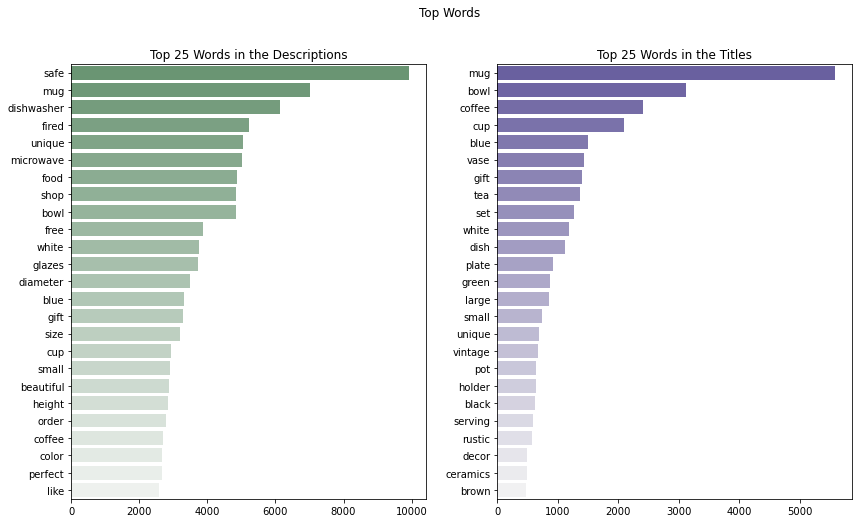

In [65]:
# plot top tags in different subsets of the data
fig, axes = plt.subplots(1,2, figsize = (14, 8))
fig.suptitle('Top Words')

# plot the top words in the descriptions
sns.barplot(ax=axes[0], x=top25desc.values, y=top25desc.index, palette='light:#639c6f_r').set(title='Top 25 Words in the Descriptions')

# plot the top wordsin the titles
sns.barplot(ax=axes[1],x=top25title.values, y=top25title.index, palette='light:#6255aa_r').set(title='Top 25 Words in the Titles')

## Tags

In [66]:
#make all tags lowercase
data['tags'] = data['tags'].str.lower()

In [67]:
#transform tags column from strings to lists
data['tags'] = data['tags'].apply(eval)

In [68]:
#get just the tags
tags = data['tags']

### Remove pottery-related stopwords from the tags

In [69]:
#define common stopwords
stopTags = ['handmade','stoneware','pottery','ceramic','clay','handmade pottery',
            'stoneware pottery','ceramics','handmade ceramics','gift','wheel thrown','one of a kind']

In [70]:
#remove stop words from tags
for i in range (0, len(tags)):
    for s in stopTags:
        tags_list = tags[i]
        if s in tags_list:
            tags_list.remove(s)

In [71]:
#add clean tags to original df
data['clean_tags'] = tags

In [72]:
# save dataframe with clean tags 
#data.to_csv('data/tags-cleaned041022.csv')

In [73]:
#get the value counts for each of the tags
tagCounts = oneD(tags).value_counts()

In [74]:
# Sort the top tags overall
top25 = tagCounts.head(25).sort_values(ascending=False)

In [75]:
# the word "spoon" is appearing in the top words in the titles so I wanted to see what the related tags are:
tagCounts[tagCounts.index.str.contains(pat = 'spoon')]

spoon rest              182
ceramic spoon rest       69
pottery spoon rest       51
handmade spoon rest      48
stoneware spoon rest     39
                       ... 
ice cream spoon           1
hand built spoons         1
spoon organizer jar       1
asian spoon               1
cream spoon rest          1
Length: 271, dtype: int64

#### I repeated the above for all the top words in the titles that were products so I could see if they were normally used in a phrase like "spoon rest" rather than individually and used this later on in the "Business Information" notebook

### Get top 20 tags for top-favorited and top rated shops

In [76]:
#dataframe with tags, num of favorites
itemData = data[['listing_id','clean_tags','num_favorers_listing']]

In [78]:
#look at top 10 listings according to number of favorers
itemData.sort_values(by = ['num_favorers_listing'], ascending = False).head(10)

,listing_id,clean_tags,num_favorers_listing
3451,175789619,"[best selling mug, gift under 50, gift for dad...",26530
1849,792180615,"[ceramic mug, handpainted mug, nature mug, flo...",13605
936,900330801,"[wheel thrown pottery, fine art ceramics, dini...",13324
2219,1086863643,"[caffeine addict, coffee lover, gift for mom, ...",10564
10185,535025569,"[coffee cup, parceline, tea cup, coffee mug, c...",9678
2,741218574,"[handmade ceramic mug, handmade mug, ceramic m...",8344
40,677424431,"[handmade coffee mug, birthday gift mug, coffe...",7948
445,128982522,"[etsymudteam, claylicious, stoneware berry bow...",7939
4075,1112309379,"[handmade mug, stoneware mug, home decor, cera...",7910
5427,151354984,"[cup, teacup, roses, dots, pink, light blue, m...",7476


In [79]:
#this is the 3,873 listings with at least 10 favorers
TenOrMore = itemData[itemData['num_favorers_listing']>=10]

In [80]:
#get the value counts for each of the tags in TenOrMore
tagCountsFavs = oneD(TenOrMore["clean_tags"]).value_counts()

In [81]:
# Sort the top 25 tags from the listings with ten or more favorers
top25Favs = tagCountsFavs.head(25).sort_values(ascending=False)

### Get top 25 tags for shops with at least 10 review and review averages greater than 4.9

In [86]:
# dataframe with tags, shop review count, and review average
shopData = data[['listing_id','clean_tags','num_favorers_listing','review_average', 'review_count']]

In [87]:
# get the shops that have at least 10 reviews
shops10reviews = shopData[shopData['review_count']>=10]

In [88]:
#this is the 9036 listings from shops with at least 10 reviews
TenReviews =  shopData[shopData['review_count']>=10]

In [89]:
# this is the 8106 listings from shops with at least 10 reviews AND a 4.8 star rating or higher
topShops =  TenReviews[TenReviews['review_average']>=4.9]

In [90]:
#get the value counts for each of the tags in the topShops listings
tagCountsTopShops = oneD(topShops["clean_tags"]).value_counts()

# Sort the top 25 tags from the listings with ten or more favorers
top25TopShops = tagCountsTopShops.head(25).sort_values(ascending=False)

Text(0.5, 1.0, 'Top 25 Tags for Listings from Shops w/4.9 or Higher Rating and At Least 10 Reviews')

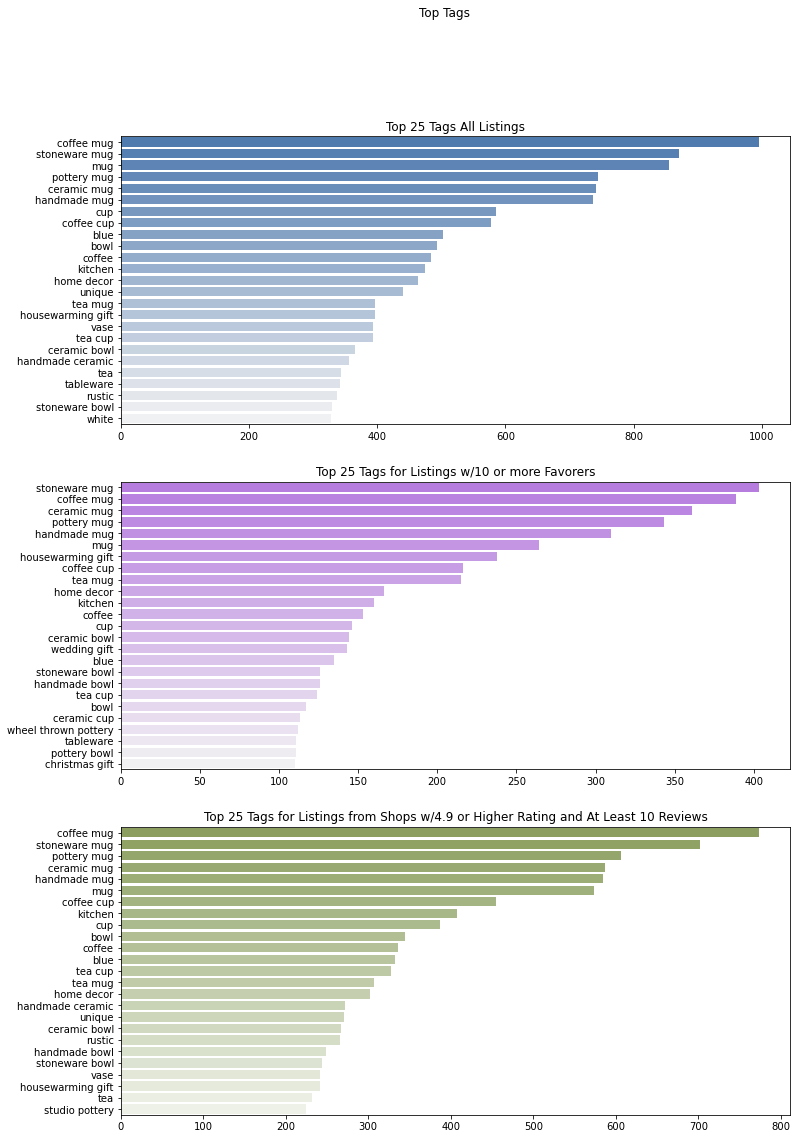

In [91]:
# plot top tags in different subsets of the data
fig, axes = plt.subplots(3, 1, figsize = (12, 18))
fig.suptitle('Top Tags')

# plot all the top tags overall
sns.barplot(ax=axes[0], x=top25.values, y=top25.index, palette='light:#4079bf_r')
axes[0].set_title('Top 25 Tags All Listings')

# plot the top tags for listings with 10 or more favorers
sns.barplot(ax=axes[1], x=top25Favs.values, y=top25Favs.index, palette='light:#b96cf0_r')
axes[1].set_title('Top 25 Tags for Listings w/10 or more Favorers')

# plot the top tags for listings from shops with at least 10 reviews and a 4.9 star rating or higher
sns.barplot(ax=axes[2], x=top25TopShops.values, y=top25TopShops.index, palette='light:#90aa55_r')
axes[2].set_title('Top 25 Tags for Listings from Shops w/4.9 or Higher Rating and At Least 10 Reviews')